# Biểu đồ hóa log huấn luyện

## Hàm

In [48]:
def read_log(file):
    result = dict()
    key = ''
    val = []
    with open(file, 'r') as file:
        for line in file:
            if line.startswith('name:'):
                if key != '':
                    result[key] = val
                    val = []
                key = line.replace("name:", "").replace("\n","")
            else:
                temp = line.split(" Val Acc: ")[-1].split(',')[0]
                val.append(float(temp))
    result[key] = val
    return result

In [49]:
import matplotlib.pyplot as plt

def plot_multi_line(data: dict):
    plt.figure(figsize=(8, 5))

    for name, values in data.items():
        x = range(len(values))   # tự động theo độ dài list
        plt.plot(x, values)

        # Ghi tên ở cuối line nếu được đánh dấu
        if name.endswith(':write'):
            plt.text(
                x[-1],
                values[-1],
                f" {name.replace(':write', '')}",
                verticalalignment="center",
                fontsize=10
            )

    plt.xlabel("epochs")
    plt.ylabel("accuracy of test")
    # plt.title("Multi-line chart")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Trường hợp 30fps

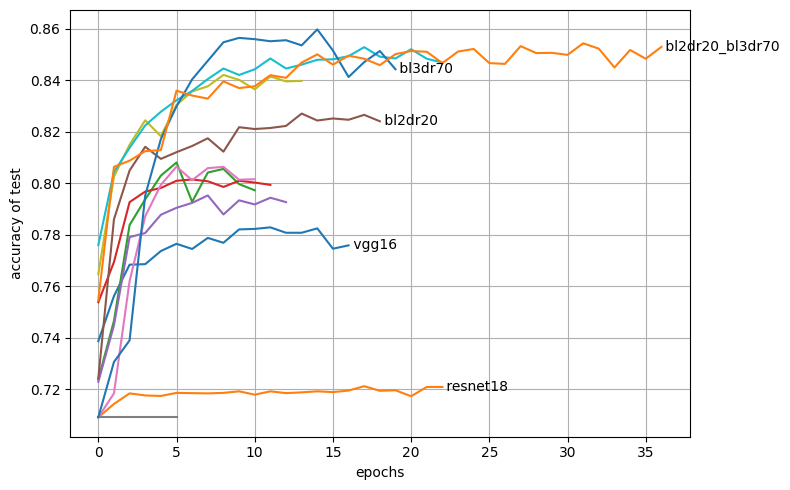

In [52]:
path = './storage/log_30fps.txt'

data = read_log(path)

plot_multi_line(data)

# Trường hợp 15fps

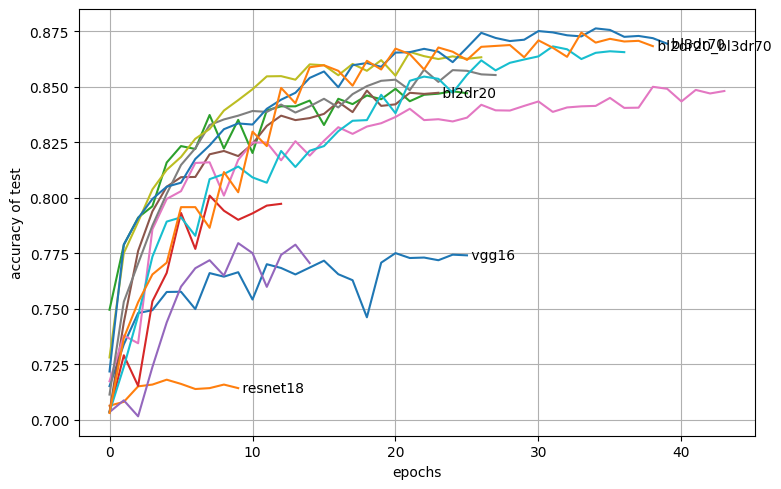

In [54]:
path = './storage/log_15fps.txt'

data = read_log(path)
plot_multi_line(data)